<a href="https://colab.research.google.com/github/EChilin5/Stock_Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network using LSTM
#Long Short Term Memory to predict Stock Price

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

get  the stock quote and display the data


# Retrieve spedific company data

In [ ]:
retrieve_days = 1000
Chewy = 'CHWY'
#chewy does not work 
Abbvie = 'ABBV'
Sony = 'SNE'
Target = 'TGT'
three_mmm = 'MMM'
Micro = 'AMD'
Company_Key= three_mmm
start_Date = '2005-01-01'
end_Date = '2020-12-04'

In [ ]:
df = web.DataReader(Company_Key, data_source='yahoo', start=start_Date, end=end_Date )
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,83.400002,82.050003,82.169998,82.400002,3192000.0,53.867741
2005-01-04,83.019997,81.669998,82.400002,81.730003,3644600.0,53.429741
2005-01-05,81.949997,80.730003,81.699997,80.730003,2895300.0,52.775993
2005-01-06,82.400002,80.820000,80.879997,81.459999,3014500.0,53.253227
2005-01-07,82.800003,81.250000,81.500000,82.300003,3293000.0,53.802364
...,...,...,...,...,...,...
2020-11-30,176.000000,172.699997,175.770004,172.729996,6141300.0,172.729996
2020-12-01,175.690002,170.009995,174.220001,170.520004,3859600.0,170.520004
2020-12-02,172.580002,170.220001,170.259995,171.850006,2421800.0,171.850006


get number of rows and columns

In [ ]:
df.shape

(4010, 6)

visualize the code




Create a dataframe based on the closieing column

In [ ]:
data=df.filter(['Close'])
#convert dataframe to numpy
dataset =data.values
# get number of row to train the model
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

3208

scale the data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18713099],
       [0.18404059],
       [0.17942805],
       ...,
       [0.59972326],
       [0.59963099],
       [0.60253691]])

create the training data set



In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train=[]
y_train=[]

for i in range(retrieve_days, len(train_data)):
   x_train.append(train_data[i-retrieve_days:i, 0])
   y_train.append(train_data[i, 0])

#convert the data to numpy
x_train, y_train = np.array(x_train), np.array(y_train)


reshape the data


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2208, 1000, 1)

build lstm model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

compile the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=1000, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 136ms/step - loss: 0.1171 - accuracy: 4.5290e-04
Epoch 2/50
3/3 [==============================] - 0s 133ms/step - loss: 0.0130 - accuracy: 4.5290e-04
Epoch 3/50
3/3 [==============================] - 0s 134ms/step - loss: 0.0257 - accuracy: 4.5290e-04
Epoch 4/50
3/3 [==============================] - 0s 136ms/step - loss: 0.0058 - accuracy: 4.5290e-04
Epoch 5/50
3/3 [==============================] - 0s 137ms/step - loss: 0.0070 - accuracy: 4.5290e-04
Epoch 6/50
3/3 [==============================] - 0s 136ms/step - loss: 0.0098 - accuracy: 4.5290e-04
Epoch 7/50
3/3 [==============================] - 0s 137ms/step - loss: 0.0055 - accuracy: 4.5290e-04
Epoch 8/50
3/3 [==============================] - 0s 139ms/step - loss: 0.0024 - accuracy: 4.5290e-04
Epoch 9/50
3/3 [==============================] - 0s 135ms/step - loss: 0.0038 - accuracy: 4.5290e-04
Epoch 10/50
3/3 [==============================] - 0s 139ms/step - loss: 0.0031 - 

In [ ]:
#create testing data set
#create a new array for testing
test_data = scaled_data[training_data_len - retrieve_days: , :]
#create the datasets for x and y test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(retrieve_days, len(test_data)):
  x_test.append(test_data[i-(retrieve_days):i, 0])

In [ ]:
#convert data to numpy
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the MSE mean squared error
mse = np.sqrt(np.mean(predictions - y_test) **2)
mse

1.1880591242687957

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


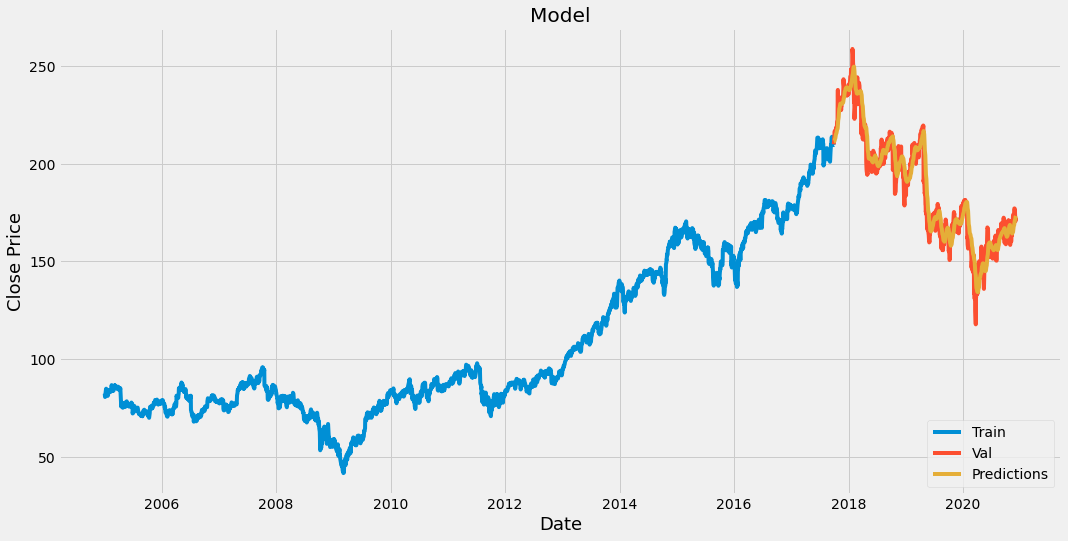

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2017-09-29,209.899994,211.281509
2017-10-02,212.759995,211.364746
2017-10-03,214.570007,211.509613
2017-10-04,216.520004,211.753159
2017-10-05,216.369995,212.128983
...,...,...
2020-11-30,172.729996,171.737717
2020-12-01,170.520004,172.380661
2020-12-02,171.850006,172.798279


In [ ]:
#get the quote
company_quote = web.DataReader(Company_Key, data_source='yahoo', start=start_Date, end=end_Date)
new_df = company_quote.filter(['Close'])
#get the last 60 day  clsoring price conver to array
last_days = new_df[-retrieve_days:].values
#scale data between 0 and 1
last_days_scaled = scaler.transform(last_days)
#create and empty list
X_Final_Test = []
#append the last 60 days
X_Final_Test.append(last_days_scaled)
#convert the x_test to a numpy array
X_Final_Test = np.array(X_Final_Test)
X_Final_Test = np.reshape(X_Final_Test, (X_Final_Test.shape[0], X_Final_Test.shape[1], 1))
#get the predicted scale

pred_price = model.predict(X_Final_Test)
pred_price = scaler.inverse_transform(pred_price)
print(Company_Key + " Prediction")
print(pred_price)

MMM Prediction
[[173.36275]]


In [ ]:
#get the quote
company_actual_quote = web.DataReader(Company_Key, data_source='yahoo', start=end_Date, end=end_Date )
print('Actaul closing Data ' + Company_Key)
print(company_actual_quote['Close'])

Actaul closing Data MMM
Date
2020-12-04    172.460007
2020-12-04    172.460007
Name: Close, dtype: float64
